In [78]:
from subprocess import run
import sys
from pathlib import Path

import cantera as ct
import pandas as pd
import numpy as np
import os
import tqdm

# ROPの行列を取得する

In [79]:
gas = ct.Solution('gri30.yaml')
species_names = gas.species_names
print(species_names)

['H2', 'H', 'O', 'O2', 'OH', 'H2O', 'HO2', 'H2O2', 'C', 'CH', 'CH2', 'CH2(S)', 'CH3', 'CH4', 'CO', 'CO2', 'HCO', 'CH2O', 'CH2OH', 'CH3O', 'CH3OH', 'C2H', 'C2H2', 'C2H3', 'C2H4', 'C2H5', 'C2H6', 'HCCO', 'CH2CO', 'HCCOH', 'N', 'NH', 'NH2', 'NH3', 'NNH', 'NO', 'NO2', 'N2O', 'HNO', 'CN', 'HCN', 'H2CN', 'HCNN', 'HCNO', 'HOCN', 'HNCO', 'NCO', 'N2', 'AR', 'C3H7', 'C3H8', 'CH2CHO', 'CH3CHO']


In [80]:
reaction_names = gas.reaction_equations()
print(reaction_names)

['2 O + M <=> O2 + M', 'H + O + M <=> OH + M', 'H2 + O <=> H + OH', 'HO2 + O <=> O2 + OH', 'H2O2 + O <=> HO2 + OH', 'CH + O <=> CO + H', 'CH2 + O <=> H + HCO', 'CH2(S) + O <=> CO + H2', 'CH2(S) + O <=> H + HCO', 'CH3 + O <=> CH2O + H', 'CH4 + O <=> CH3 + OH', 'CO + O (+M) <=> CO2 (+M)', 'HCO + O <=> CO + OH', 'HCO + O <=> CO2 + H', 'CH2O + O <=> HCO + OH', 'CH2OH + O <=> CH2O + OH', 'CH3O + O <=> CH2O + OH', 'CH3OH + O <=> CH2OH + OH', 'CH3OH + O <=> CH3O + OH', 'C2H + O <=> CH + CO', 'C2H2 + O <=> H + HCCO', 'C2H2 + O <=> C2H + OH', 'C2H2 + O <=> CH2 + CO', 'C2H3 + O <=> CH2CO + H', 'C2H4 + O <=> CH3 + HCO', 'C2H5 + O <=> CH2O + CH3', 'C2H6 + O <=> C2H5 + OH', 'HCCO + O <=> 2 CO + H', 'CH2CO + O <=> HCCO + OH', 'CH2CO + O <=> CH2 + CO2', 'CO + O2 <=> CO2 + O', 'CH2O + O2 <=> HCO + HO2', 'H + O2 + M <=> HO2 + M', 'H + O2 + O2 <=> HO2 + O2', 'H + O2 + H2O <=> HO2 + H2O', 'H + O2 + N2 <=> HO2 + N2', 'H + O2 + AR <=> HO2 + AR', 'H + O2 <=> O + OH', '2 H + M <=> H2 + M', '2 H + H2 <=> H2 +

In [81]:
stoich_coeffs = gas.product_stoich_coeffs - gas.reactant_stoich_coeffs
stoich_coeffs

array([[ 0.,  0., -1., ...,  0.,  0.,  0.],
       [ 0., -1.,  1., ...,  0.,  0.,  0.],
       [-2., -1., -1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [82]:
df_stoich = pd.DataFrame(stoich_coeffs, columns=reaction_names, index=species_names)
df_stoich.head()

,2 O + M <=> O2 + M,H + O + M <=> OH + M,H2 + O <=> H + OH,HO2 + O <=> O2 + OH,H2O2 + O <=> HO2 + OH,CH + O <=> CO + H,CH2 + O <=> H + HCO,CH2(S) + O <=> CO + H2,CH2(S) + O <=> H + HCO,CH3 + O <=> CH2O + H,...,C3H7 + H2O2 <=> C3H8 + HO2,C3H8 + CH3 <=> C3H7 + CH4,C2H4 + CH3 (+M) <=> C3H7 (+M),C3H7 + O <=> C2H5 + CH2O,C3H7 + H (+M) <=> C3H8 (+M),C3H7 + H <=> C2H5 + CH3,C3H7 + OH <=> C2H5 + CH2OH,C3H7 + HO2 <=> C3H8 + O2,C3H7 + HO2 => C2H5 + CH2O + OH,C3H7 + CH3 <=> 2 C2H5
H2,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
H,0.0,-1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0
O,-2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
O2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
OH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0


In [83]:
species_target = 'H2O2'
df_stoich_target = df_stoich.loc[species_target, :]
df_stoich_target.head()

2 O + M <=> O2 + M       0.0
H + O + M <=> OH + M     0.0
H2 + O <=> H + OH        0.0
HO2 + O <=> O2 + OH      0.0
H2O2 + O <=> HO2 + OH   -1.0
Name: H2O2, dtype: float64

# ropのデータを読み込む

In [84]:
num_pulse = 20
pulse_frequency = 20


file_csv = f'df_strage_{num_pulse}Pulses_{pulse_frequency}kHz.csv'
path_csv = os.path.join('input', file_csv)
print(os.path.exists(path_csv), path_csv)

True input/df_strage_20Pulses_20kHz.csv


In [85]:
# file_csv = 'df_strage_20Pulses_20kHz.csv'
# path_csv = os.path.join('input', file_csv)

file_rop = 'reactions_rop_' + file_csv.split('.csv')[0] + '.csv'
path_rop = os.path.join('output', file_rop)

print(os.path.exists(path_rop), path_rop)
df_rop = pd.read_csv(path_rop, index_col=0).T
df_rop.head()

True output/reactions_rop_df_strage_20Pulses_20kHz.csv


,t(sec),2 O + M <=> O2 + M,H + O + M <=> OH + M,H2 + O <=> H + OH,HO2 + O <=> O2 + OH,H2O2 + O <=> HO2 + OH,CH + O <=> CO + H,CH2 + O <=> H + HCO,CH2(S) + O <=> CO + H2,CH2(S) + O <=> H + HCO,...,C3H7 + H2O2 <=> C3H8 + HO2,C3H8 + CH3 <=> C3H7 + CH4,C2H4 + CH3 (+M) <=> C3H7 (+M),C3H7 + O <=> C2H5 + CH2O,C3H7 + H (+M) <=> C3H8 (+M),C3H7 + H <=> C2H5 + CH3,C3H7 + OH <=> C2H5 + CH2OH,C3H7 + HO2 <=> C3H8 + O2,C3H7 + HO2 => C2H5 + CH2O + OH,C3H7 + CH3 <=> 2 C2H5
0,0.000000e+00,2020.614205,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
0.1,1.097389e-12,2020.605615,1.510303e-10,1.768000e-16,2.553901e-12,7.791542e-25,8.175864e-38,3.105243e-22,4.385400e-20,4.385400e-20,...,-3.506539e-73,2.016243e-62,2.664538e-51,3.924788e-51,2.577606e-65,-5.398048e-51,1.244912e-61,4.661860e-70,2.115481e-68,1.463618e-62
0.2,2.194778e-12,2020.597025,6.034904e-10,7.071478e-16,1.852356e-11,5.655402e-24,3.206663e-36,3.717157e-21,3.173424e-19,3.173424e-19,...,-5.582653e-71,8.988574e-61,1.067899e-49,1.208109e-49,3.170405e-63,-8.038236e-50,7.669774e-60,1.040809e-67,4.723034e-66,9.101621e-61
0.3,3.840861e-12,2020.584104,1.845351e-09,2.165404e-15,9.410436e-11,2.876195e-23,7.507211e-35,2.979248e-20,1.606722e-18,1.606722e-18,...,-3.992473e-69,2.227069e-59,2.450809e-48,2.487134e-48,1.995809e-61,-7.418520e-49,2.767012e-58,1.088559e-65,4.939715e-64,3.347096e-59
0.4,4.938250e-12,2020.575513,3.047318e-09,3.579283e-15,1.971598e-10,6.030335e-23,3.146974e-34,7.767193e-20,3.358650e-18,3.358650e-18,...,-2.828457e-68,9.698690e-59,1.031250e-47,1.015786e-47,1.346055e-60,-2.047533e-48,1.453794e-57,9.314622e-65,4.226835e-63,1.772308e-58


In [86]:
df_rop_target = df_rop.iloc[:, 1:]*df_stoich_target
df_rop_target = pd.concat((df_rop['t(sec)'], df_rop_target), axis=1)
df_rop_target.head()

,t(sec),2 O + M <=> O2 + M,H + O + M <=> OH + M,H2 + O <=> H + OH,HO2 + O <=> O2 + OH,H2O2 + O <=> HO2 + OH,CH + O <=> CO + H,CH2 + O <=> H + HCO,CH2(S) + O <=> CO + H2,CH2(S) + O <=> H + HCO,...,C3H7 + H2O2 <=> C3H8 + HO2,C3H8 + CH3 <=> C3H7 + CH4,C2H4 + CH3 (+M) <=> C3H7 (+M),C3H7 + O <=> C2H5 + CH2O,C3H7 + H (+M) <=> C3H8 (+M),C3H7 + H <=> C2H5 + CH3,C3H7 + OH <=> C2H5 + CH2OH,C3H7 + HO2 <=> C3H8 + O2,C3H7 + HO2 => C2H5 + CH2O + OH,C3H7 + CH3 <=> 2 C2H5
0,0.000000e+00,0.0,0.0,0.0,0.0,-0.000000e+00,0.0,0.0,0.0,0.0,...,-0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.1,1.097389e-12,0.0,0.0,0.0,0.0,-7.791542e-25,0.0,0.0,0.0,0.0,...,3.506539e-73,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0
0.2,2.194778e-12,0.0,0.0,0.0,0.0,-5.655402e-24,0.0,0.0,0.0,0.0,...,5.582653e-71,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0
0.3,3.840861e-12,0.0,0.0,0.0,0.0,-2.876195e-23,0.0,0.0,0.0,0.0,...,3.992473e-69,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0
0.4,4.938250e-12,0.0,0.0,0.0,0.0,-6.030335e-23,0.0,0.0,0.0,0.0,...,2.828457e-68,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0


In [87]:
file_base = file_csv.split('.csv')[0]
file_export = f'species_rop_{species_target}_{file_base}.csv'
path_export = os.path.join('output', file_export)
df_rop_target.to_csv(path_export)
print('Species ROP is exported to file: ', path_export)

Species ROP is exported to file:  output/species_rop_H2O2_df_strage_20Pulses_20kHz.csv


# test to analyze

<Axes: >

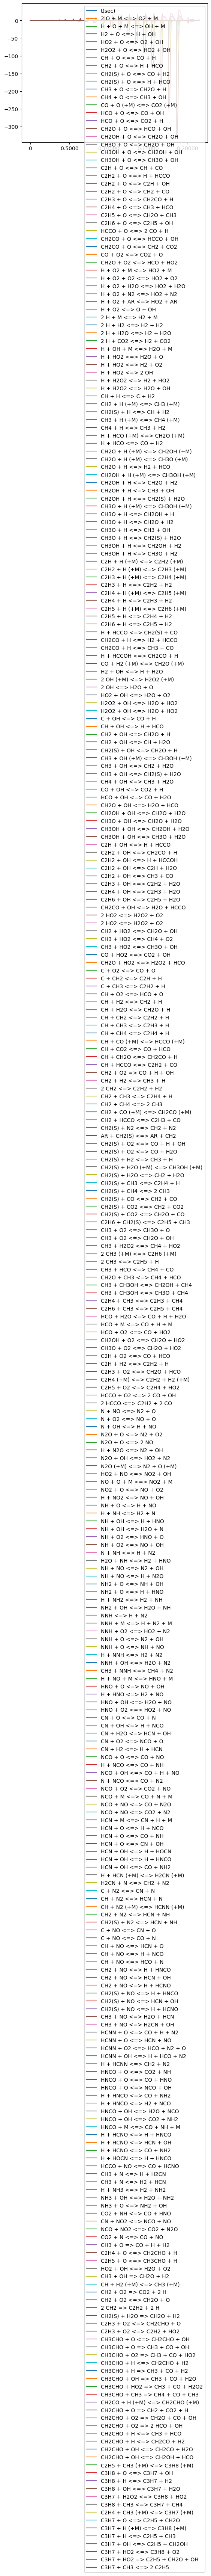

In [88]:
df_rop_target.plot()